原文 [How to Create an ARIMA Model for Time Series Forecasting with Python](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

 1. 求和自回归移动平均（ARIMA, AutoRegressive Integrated Moving Average）
 2. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:
   - AR: Autoregression. 使用当前观察点以及若干延迟时期观察点的依赖关系进行建模。
   - I: Integrated. 为使序列平稳而进行数据转化
   - MA: Moving Average. 使用当前观察点以及若干延迟时期观察点在移动平均模型上的残差的依赖关系进行建模。
 3. The parameters of the ARIMA model are defined as follows:
   - p: The number of lag observations included in the model, also called the lag order.
   - d: The number of times that the raw observations are differenced, also called the degree of differencing.
   - q: The size of the moving average window, also called the order of moving average.
   
- 数据是1901-1903年期间每月洗发水的销售量，每月销售量具有明显的上升趋势，因为这是非平稳序列，首先消除上升趋势。
- 模型定阶为ARIMA(5, 1, 0)
- 残差存在趋势，信息未完全提取
- 使用滚动预测，先划分训练集与测试集，使用训练集训练出第一个模型，在预测下一个值；之后将该真实值放入训练集重新开始训练。

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


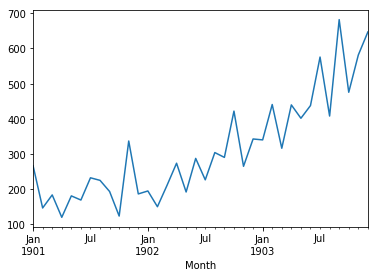

In [1]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot


def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

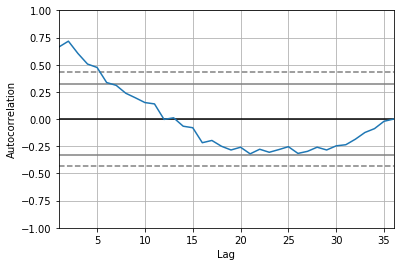

In [2]:
# 自相关图
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot


def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')


series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Thu, 18 Jan 2018   AIC                            406.340
Time:                        22:45:40   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

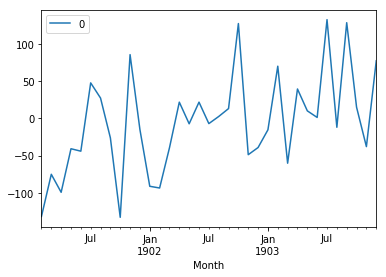

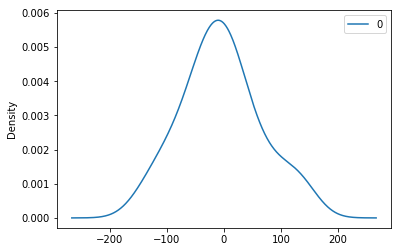

                0
count   35.000000
mean    -5.495254
std     68.132879
min   -133.296630
25%    -42.477923
50%     -7.186696
75%     24.748294
max    133.237951


In [6]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')  # 密度图
pyplot.show()
print(residuals.describe())

predicted=349.117623, expected=342.300000
predicted=306.512928, expected=339.700000
predicted=387.376405, expected=440.400000
predicted=348.154206, expected=315.900000
predicted=386.308782, expected=439.300000
predicted=356.082061, expected=401.300000
predicted=446.379487, expected=437.400000
predicted=394.737317, expected=575.500000
predicted=434.915513, expected=407.600000
predicted=507.923355, expected=682.000000
predicted=435.482830, expected=475.300000
predicted=652.743749, expected=581.300000
predicted=546.343527, expected=646.900000
Test MSE: 6958.326


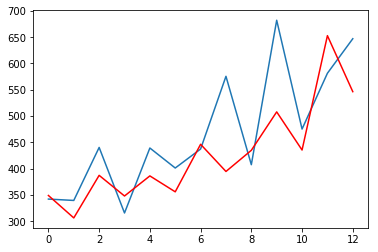

In [7]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

原文 [How to Tune ARIMA Parameters in Python](https://machinelearningmastery.com/tune-arima-parameters-python/)

- 调节ARIMA模型参数
- walk-forward validation：下一个观察值会被加入训练集并更新模型
- 预设模型为ARIMA(4, 1, 0)
- disp: 详细信息展示
- transparams: 默认True；检查平稳性与可逆性
- trend: 偏置
- solver: 

Test RMSE: 84.832


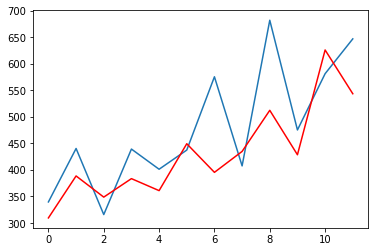

In [21]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
train, test = X[0:-12], X[-12:]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    # fit model
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0, transparams=1, trend='c')
    # one step forecast
    yhat = model_fit.forecast()[0]
    # store forecast and ob
    predictions.append(yhat)
    history.append(test[t])
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Solver=lbfgs, Test RMSE: 81.545, Time=1.530596
Solver=bfgs, Test RMSE: 81.545, Time=2.092870


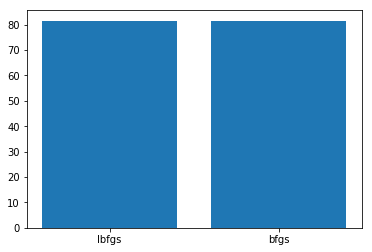

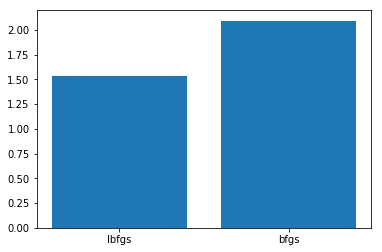

In [26]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
from time import time
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
# solvers
solvers = ['lbfgs', 'bfgs']
# solvers = ['lbfgs', 'bfgs', 'newton', 'nm', 'cg', 'ncg', 'powell']
scores = []
times = []
for solver in solvers:
    start_time = time()
    history = [x for x in train]
    predictions = list()
    # walk-forward validation
    for t in range(len(test)):
        # fit model
        model = ARIMA(history, order=(4,1,0))
        model_fit = model.fit(disp=False, solver=solver)
        # one step forecast
        yhat = model_fit.forecast()[0]
        # store forecast and ob
        predictions.append(yhat)
        history.append(test[t])
    # evaluate forecasts
    rmse = sqrt(mean_squared_error(test, predictions))
    timing = time() - start_time
    scores.append(rmse)
    times.append(timing)
    print('Solver=%s, Test RMSE: %.3f, Time=%f' % (solver, rmse, timing))
# plot scores
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, scores)
pyplot.xticks(ticks, solvers)
pyplot.show()
# plot times
ticks = [i for i in range(len(solvers))]
pyplot.bar(ticks, times)
pyplot.xticks(ticks, solvers)
pyplot.show()

原文 [How to Grid Search ARIMA Model Hyperparameters with Python](https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/)

- 使用网格搜索调节超参，实际就是遍历不同的(p, d, q)组合
- 扩展：
 - 加入ACF、PACF
 - MSE可换成AIC或BIC
 - 可观察残差，是否符合高斯分布
 - 更新模型而不是重置模型
 - 建模前的数据检查，如平稳性等

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [27]:
import warnings
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# load dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=52425.268
ARIMA(0, 0, 1) MSE=38145.139
ARIMA(0, 0, 2) MSE=23989.475
ARIMA(0, 1, 0) MSE=18003.173
ARIMA(0, 1, 1) MSE=9558.277
ARIMA(0, 2, 0) MSE=67339.808
ARIMA(0, 2, 1) MSE=18322.484
ARIMA(1, 0, 0) MSE=23113.028
ARIMA(1, 1, 0) MSE=7121.362
ARIMA(1, 1, 1) MSE=7003.686
ARIMA(1, 2, 0) MSE=18608.036
ARIMA(2, 1, 0) MSE=5689.927
ARIMA(2, 1, 1) MSE=7759.707
ARIMA(2, 2, 0) MSE=9860.944
ARIMA(4, 1, 0) MSE=6649.593
ARIMA(4, 1, 1) MSE=6796.306
ARIMA(4, 2, 0) MSE=7596.339
ARIMA(4, 2, 1) MSE=4694.876
ARIMA(6, 1, 0) MSE=6810.077
ARIMA(6, 2, 0) MSE=6261.083
ARIMA(8, 1, 0) MSE=6579.778
Best ARIMA(4, 2, 1) MSE=4694.876


原文 [Sensitivity Analysis of History Size to Forecast Skill with ARIMA in Python](https://machinelearningmastery.com/sensitivity-analysis-history-size-forecast-skill-arima-python/)

- How much history is required for a time series forecast model?
- 数据来源：墨尔本1981-1990年最低日气温，3650个观察点
- 消除季节性趋势：直接减去t-365点的值，存在的问题是没有考虑闰年，且第一年数据不可用
- 2-9年数据为训练集，第10年数据为测试集
- 分别使用1年、2年、...、8年数据作为训练集
- 结论：随着历史数据的增多，效果越好，但付出了运行时间的代价

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


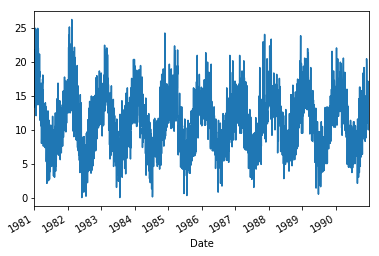

In [41]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

In [43]:
# seasonal difference
differenced = series.diff(365)
# trim off the first year of empty data
differenced = differenced[365:]
# fit model
model = ARIMA(differenced, order=(7,0,0))
model_fit = model.fit(trend='nc', disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   Temp   No. Observations:                 3285
Model:                     ARMA(7, 0)   Log Likelihood               -8690.089
Method:                       css-mle   S.D. of innovations              3.409
Date:                Fri, 19 Jan 2018   AIC                          17396.178
Time:                        15:47:24   BIC                          17444.955
Sample:                    01-01-1982   HQIC                         17413.643
                         - 12-31-1990                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.Temp     0.5278      0.017     30.264      0.000       0.494       0.562
ar.L2.Temp    -0.1099      0.020     -5.575      0.000      -0.149      -0.071
ar.L3.Temp     0.0286      0.020      1.441      0.1

In [16]:
# fit an ARIMA model
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# seasonal difference
differenced = series.diff(365)
# trim off the first year of empty data
differenced = differenced[365:]
# split
train, test = differenced[differenced.index < '1990'], differenced['1990']
years = ['1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982']

In [17]:
dataset = train[train.index >= '1989']

In [18]:
values = dataset.values
history = [values[i] for i in range(len(values))]
predictions = list()
test_values = test.values

In [19]:
model = ARIMA(history, order=(7,0,0))
model_fit = model.fit(trend='nc', disp=0)

In [20]:
model_fit.forecast()

(-0.57863548289642974,
 array([ 3.21300794]),
 array([[-6.87601533,  5.71874436]]))

In [44]:
# fit an ARIMA model
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# seasonal difference
differenced = series.diff(365)
# trim off the first year of empty data
differenced = differenced[365:]
# split
train, test = differenced[differenced.index < '1990'], differenced['1990']
years = ['1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982']
for year in years:
    # select data from 'year' cumulative to 1989
    dataset = train[train.index >= year]
    # walk forward over time steps in test
    values = dataset.values
    history = [values[i] for i in range(len(values))]
    predictions = list()
    test_values = test.values
    for t in range(len(test_values)):
        # fit model
        model = ARIMA(history, order=(7,0,0))
        model_fit = model.fit(trend='nc', disp=0)
        # make prediction
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test_values[t])
    rmse = sqrt(mean_squared_error(test_values, predictions))
    print('%s-%s (%d values) RMSE: %.3f' % (years[0], year, len(values), rmse))

1989-1989 (365 values) RMSE: 3.120
1989-1988 (730 values) RMSE: 3.109
1989-1987 (1095 values) RMSE: 3.104
1989-1986 (1460 values) RMSE: 3.108
1989-1985 (1825 values) RMSE: 3.107
1989-1984 (2190 values) RMSE: 3.103
1989-1983 (2555 values) RMSE: 3.099
1989-1982 (2920 values) RMSE: 3.096


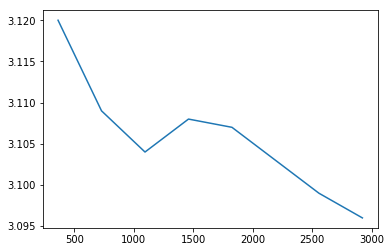

In [45]:
from matplotlib import pyplot
x = [365, 730, 1095, 1460, 1825, 2190, 2555, 2920]
y = [3.120, 3.109, 3.104, 3.108, 3.107, 3.103, 3.099, 3.096]
pyplot.plot(x, y)
pyplot.show()

原文 [How to Save an ARIMA Time Series Forecasting Model in Python](https://machinelearningmastery.com/save-arima-time-series-forecasting-model-python/)

- 保存ARIMA模型，由于存在Bug，本文主要解决bug
- 数据来源：1959年加州每日女生生育数

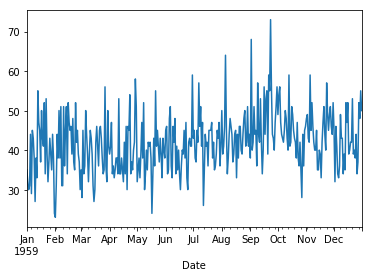

In [47]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('daily-total-female-births.csv', header=0)
series.plot()
pyplot.show()

In [51]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
 
# 修复不能读取ARIMA模型的几行代码
# monkey patch around bug in ARIMA class
def __getnewargs__(self):
    return ((self.endog),(self.k_lags, self.k_diff, self.k_ma))
ARIMA.__getnewargs__ = __getnewargs__
 
# load data
series = Series.from_csv('daily-total-female-births.csv', header=0)
# prepare data
X = series.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(1,1,1))
model_fit = model.fit()
# save model
model_fit.save('model.pkl')
# load model
loaded = ARIMAResults.load('model.pkl')

### [How to Make Out-of-Sample Forecasts with ARIMA in Python](https://machinelearningmastery.com/make-sample-forecasts-arima-python/)

- 数据来源：墨尔本1981-1990年最低日气温，3650个观察点
- 最后七个样本点作为数据以外的点
- forecast()预测下一时刻/时间段
- predict()可指定时间点/时间段预测
- 实现多步预测

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


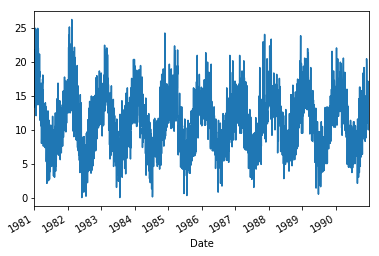

In [1]:
# line plot of time series
from pandas import Series
from matplotlib import pyplot
# load dataset
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# display first few rows
print(series.head(5))
# line plot of dataset
series.plot()
pyplot.show()

In [2]:
# split the dataset
from pandas import Series
series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
split_point = len(series) - 7
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv')
validation.to_csv('validation.csv')

Dataset 3643, Validation 7


In [4]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# 差分消除趋势
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)
# print summary of fit model
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3278
Model:                     ARMA(7, 1)   Log Likelihood               -8673.748
Method:                       css-mle   S.D. of innovations              3.411
Date:                Tue, 17 Apr 2018   AIC                          17367.497
Time:                        15:54:53   BIC                          17428.447
Sample:                             0   HQIC                         17389.322
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0132      0.132      0.100      0.921      -0.246       0.273
ar.L1.y        1.1424      0.287      3.976      0.000       0.579       1.706
ar.L2.y       -0.4346      0.154     -2.829      0.0

In [5]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
# forecast进行预测
# one-step out-of sample forecast
forecast = model_fit.forecast()[0]
# invert the differenced forecast to something usable
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861668


In [14]:
len(model_fit.predict())

3278

In [9]:
# predict进行预测
# one-step out of sample forecast
start_index = len(differenced)
end_index = len(differenced)
forecast = model_fit.predict(start=start_index, end=end_index)
forecast = inverse_difference(X, forecast, days_in_year)
print('Forecast: %f' % forecast)

Forecast: 14.861668


In [64]:
# 多步预测
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 14.861669
Day 2: 15.628785
Day 3: 13.331349
Day 4: 11.722414
Day 5: 10.421524
Day 6: 14.415550
Day 7: 12.674712


In [65]:
# multi-step out-of-sample forecast
start_index = len(differenced)
end_index = start_index + 6
forecast = model_fit.predict(start=start_index, end=end_index)
# invert the differenced forecast to something usable
history = [x for x in X]
day = 1
for yhat in forecast:
    inverted = inverse_difference(history, yhat, days_in_year)
    print('Day %d: %f' % (day, inverted))
    history.append(inverted)
    day += 1

Day 1: 14.861669
Day 2: 15.628785
Day 3: 13.331349
Day 4: 11.722414
Day 5: 10.421524
Day 6: 14.415550
Day 7: 12.674712


# 测试

In [15]:
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
import numpy

# 差分消除趋势
# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return numpy.array(diff)
 
# load dataset
series = Series.from_csv('dataset.csv', header=None)
# seasonal difference
X = series.values
days_in_year = 365
differenced = difference(X, days_in_year)
# fit model
model = ARIMA(differenced, order=(7,0,1))
model_fit = model.fit(disp=0)

In [17]:
model_fit.forecast()

(array([-1.53833157]),
 array([ 3.41119384]),
 array([[-8.22414864,  5.14748549]]))

In [29]:
def get_train_test_features():
    return 1
_damaged = ''
_seasonal = ''
x = eval('get_train_test{_damaged}{_seasonal}_features'.format(**locals()))

In [32]:
[float(v if v!='' else 'nan') for v in [1,2,3,4,5,'']]

[1.0, 2.0, 3.0, 4.0, 5.0, nan]

In [35]:
import time

struct_time = time.strptime("30 Nov 00", "%d %b %y")
print "returned tuple: %s " % struct_time

returned tuple: time.struct_time(tm_year=2000, tm_mon=11, tm_mday=30, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=335, tm_isdst=-1) 


In [42]:
timestamp = datetime.datetime(2000,1,1)

In [48]:
def group(data, key_filter, key, aggregate=list):
    """
    Given an iterable of dicts, yields a new dict
    where matching keys are aggregated in a new column
    and removed from the dict
    >>> data = [{"aaa": 12, "bbb": 2, "ccc": 23},
    ...         {"aaa": 14, "bbb": 3, "ccc": 24}]
    >>> key_filter = lambda x: x in ["aaa", "bbb"]
    >>> key = "a+b"
    >>> list(group(data, key_filter, key))
    [{'a+b': [12, 2], 'ccc': 23}, {'a+b': [14, 3], 'ccc': 24}]
    >>> list(group(data, key_filter, key, sum))
    [{'a+b': 14, 'ccc': 23}, {'a+b': 17, 'ccc': 24}]
    """
    for row in data:
        res = dict([(k, row[k]) for k in row if not key_filter(k)])
        res[key] = select([row], key_filter, aggregate).next()
        yield res

In [49]:
def iter_windows(series, wsize, wstep, skip_nan=True):
    """
    >>> import numpy as np
    >>> a = np.ma.masked_invalid([1,2,3,np.nan,5,6])
    >>> [list(x) for x in iter_windows(a, 1, 1)]
    [[1.0], [2.0], [3.0], [5.0], [6.0]]
    >>> [list(x) for x in iter_windows(a, 1, 2)]
    [[1.0], [3.0], [5.0]]
    >>> [list(x) for x in iter_windows(a, 2, 1)]
    [[1.0, 2.0], [2.0, 3.0], [5.0, 6.0]]
    >>> [map(float, x) for x in iter_windows(a, 2, 1, False)]
    [[1.0, 2.0], [2.0, 3.0], [3.0, nan], [nan, 5.0], [5.0, 6.0]]
    """
    for i in range(0, len(series)-wsize+wstep, wstep):
        window = series[i:i+wsize]
        if len(window) == wsize:
            if not window.mask.any() or not skip_nan:
                yield window

In [59]:
import numpy as np
a = np.ma.masked_invalid([1,2,3,4,5,6])

In [60]:
a

masked_array(data = [1 2 3 4 5 6],
             mask = [False False False False False False],
       fill_value = 999999)

In [61]:
[list(x) for x in iter_windows(a, 1, 1)]

[[1], [2], [3], [4], [5], [6]]

In [62]:
[list(x) for x in iter_windows(a, 1, 2)]

[[1], [3], [5]]

In [63]:
[list(x) for x in iter_windows(a, 2, 2)]

[[1, 2], [3, 4], [5, 6]]

In [55]:
[map(float, x) for x in iter_windows(a, 2, 1, False)]

C:\Users\zydar\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Warning: converting a masked element to nan.
  """Entry point for launching an IPython kernel.


[[1.0, 2.0], [2.0, 3.0], [3.0, nan], [nan, 5.0], [5.0, 6.0]]

In [65]:
[1,2,3,4,5,6][::2]

[1, 3, 5]